In [119]:
import sys
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import argparse
import random as rng
rng.seed(123)

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Weekly activity

Apply histogram equalization on a histogram equalized image. In other words, apply histogram equalization twice on an image. Is there any difference between the first and second output image? You are free to use any image.

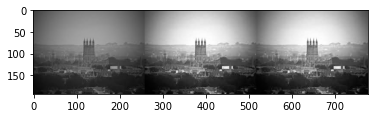

In [5]:
img_lowContrast = cv.imread('low_contrast_img.jfif', 0)   # grayscale 

eq1 = cv.equalizeHist(img_lowContrast)
eq2 = cv.equalizeHist(eq1)

result = np.hstack((img_lowContrast, eq1, eq2))
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.imshow(result)
plt.show()

Load the image 'electronic.jfif'. Then,
- Experiment with different kernel size. Which kernel size is the most appropriate?
- Perform edge detection using Sobel operator (combined both x and y) with and without image smoothing (Gaussian blurring). Display the 2 images.
- Try Laplacian of Gaussian
- Based on the exercise conducted from (A) - (C), which image processing pathway is optimal? Justify your answer.

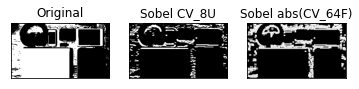

In [46]:
img_electronic = cv.imread('electronic.jfif')
gray_electronic = cv.cvtColor(img_electronic, cv.COLOR_BGR2GRAY)

# threshold
ret, img_electronic_th = cv.threshold(gray_electronic, 160, 255, cv.THRESH_BINARY)

# sobel cv_8u
sobely8u = cv.Sobel(img_electronic_th, cv.CV_8U, 0, 1, ksize = 5)

# sobel abs(cv_64f)
sobely64f = cv.Sobel(img_electronic_th, cv.CV_64F, 0, 1, ksize = 5)
abs_sobely64f = np.absolute(sobely64f)
sobel_8u = np.uint8(abs_sobely64f)

# show
plt.subplot(1, 3, 1), plt.imshow(img_electronic_th, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(sobely8u, cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(sobel_8u, cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

Sobel operator without gaussian blurring


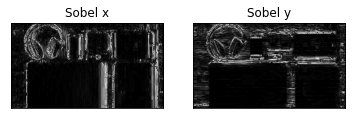

In [75]:
# without gaussian blurring
sobelx = cv.Sobel(gray_electronic, cv.CV_64F, 1, 0, ksize = 3)
sobelx_8u = np.uint8(np.absolute(sobelx))
sobely = cv.Sobel(gray_electronic, cv.CV_64F, 0, 1, ksize = 3)
sobely_8u = np.uint8(np.absolute(sobely))

# combine sobel (without blur)
sobel_combined = cv.addWeighted(sobelx_8u, 0.5, sobely_8u, 0.5, 0)

# show
print("Sobel operator without gaussian blurring")
plt.subplot(1, 2, 1), plt.imshow(sobelx_8u, cmap = 'gray')
plt.title('Sobel x'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(sobely_8u, cmap = 'gray')
plt.title('Sobel y'), plt.xticks([]), plt.yticks([])
plt.show()

Sobel operator with gaussian blurring


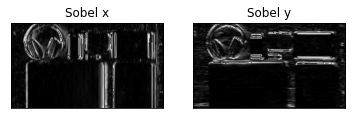

In [76]:
# with gaussian blurring
img_blur = cv.GaussianBlur(gray_electronic, (5, 5), 0)

sobelx = cv.Sobel(img_blur, cv.CV_64F, 1, 0, ksize = 3)
sobelx_8u = np.uint8(np.absolute(sobelx))
sobely = cv.Sobel(img_blur, cv.CV_64F, 0, 1, ksize = 3)
sobely_8u = np.uint8(np.absolute(sobely))

# combine sobel (with blur)
sobel_combined_blur = cv.addWeighted(sobelx_8u, 0.5, sobely_8u, 0.5, 0)

# show
print("Sobel operator with gaussian blurring")
plt.subplot(1, 2, 1), plt.imshow(sobelx_8u, cmap = 'gray')
plt.title('Sobel x'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(sobely_8u, cmap = 'gray')
plt.title('Sobel y'), plt.xticks([]), plt.yticks([])
plt.show()

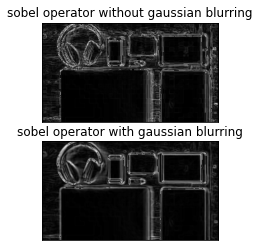

In [77]:
plt.subplot(2, 1, 1), plt.imshow(sobel_combined, cmap = 'gray')
plt.title('sobel operator without gaussian blurring'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 1, 2), plt.imshow(sobel_combined_blur, cmap = 'gray')
plt.title('sobel operator with gaussian blurring'), plt.xticks([]), plt.yticks([])
plt.show()

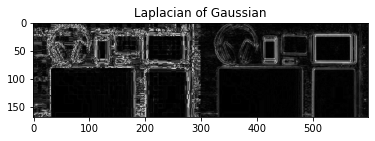

In [80]:
img_blur = cv.GaussianBlur(gray_electronic, (5, 5), 0)

# laplacian (original)
laplacian = cv.Laplacian(gray_electronic, cv.CV_64F, ksize = 3)
laplacian_8u = np.uint8(np.absolute(laplacian))

# laplacian (with blur)
laplacian_blur = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_blur = np.uint8(np.absolute(laplacian_blur))

res = np.hstack((laplacian_8u, laplacian_blur))

plt.title('Laplacian of Gaussian'), plt.imshow(res, cmap = 'gray')
plt.show()

Based on the exercise conducted from (A) - (C), the optimal image processing pathway is through gausian blurring and laplacian technique. 

Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

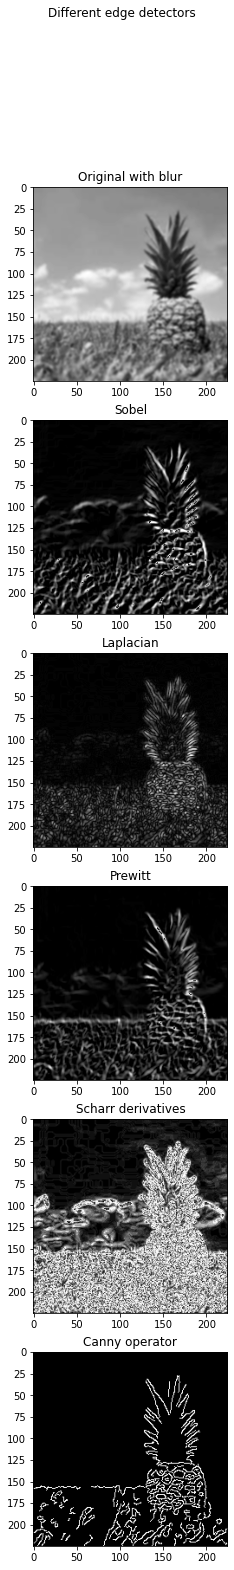

In [116]:
# input image
img_pineapple = cv.imread('pineapple.jfif')
gray_pineapple = cv.cvtColor(img_pineapple, cv.COLOR_BGR2GRAY)
blur_pineapple = cv.GaussianBlur(gray_pineapple, (5, 5), 0)

# sobel
img_sobelx = cv.Sobel(blur_pineapple,cv.CV_8U,1,0,ksize=3)
img_sobely = cv.Sobel(blur_pineapple,cv.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely

# laplacian
laplacian = cv.Laplacian(blur_pineapple, cv.CV_64F, ksize = 3)
laplacian_8u_ppap = np.uint8(np.absolute(laplacian))

# prewitt (sobel x+y)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(blur_pineapple, -1, kernelx)
img_prewitty = cv.filter2D(blur_pineapple, -1, kernely)
img_prewitt_xy = img_prewittx + img_prewitty

# scharr derivatives
scharr_X = cv.Scharr(blur_pineapple, cv.CV_64F, 1, 0) 
scharr_X_abs = np.uint8(np.absolute(scharr_X))
scharr_Y = cv.Scharr(blur_pineapple, cv.CV_64F, 0, 1) 
scharr_Y_abs = np.uint8(np.absolute(scharr_Y)) 
scharr_XY_combined = cv.bitwise_or(scharr_Y_abs,scharr_X_abs) 

# canny operator
img_canny = cv.Canny(blur_pineapple, 100, 200)

# show
f, ax = plt.subplots(6, 1, figsize = (10, 25))
f.suptitle('Different edge detectors')
ax[0].imshow(blur_pineapple, cmap = 'gray')
ax[1].imshow(img_sobel, cmap = 'gray')
ax[2].imshow(laplacian_8u_ppap, cmap = 'gray')
ax[3].imshow(img_prewitt_xy, cmap = 'gray')
ax[4].imshow(scharr_XY_combined, cmap = 'gray')
ax[5].imshow(img_canny, cmap = 'gray')

ax[0].title.set_text('Original with blur')
ax[1].title.set_text('Sobel')
ax[2].title.set_text('Laplacian')
ax[3].title.set_text('Prewitt')
ax[4].title.set_text('Scharr derivatives')
ax[5].title.set_text('Canny operator')
plt.show()

Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.
 

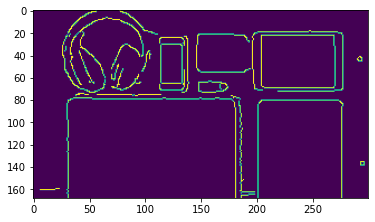

In [208]:
# input
img_electronic = cv.imread('electronic.jfif')
gray_electronic = cv.cvtColor(img_electronic, cv.COLOR_BGR2GRAY)
blur_electronic = cv.GaussianBlur(gray_electronic, (5, 5), 0)

# canny operator
img_canny_electronic = cv.Canny(blur_electronic, 100, 200)

plt.imshow(img_canny_electronic)
plt.show()

In [209]:
# draw bounding box function
def draw_boundingBox(ori_img, segmented_th):
    result = ori_img.copy()
    contours = cv.findContours(segmented_th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    for cntr in contours:
        x,y,w,h = cv.boundingRect(cntr)
        cv.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
        print("x,y,w,h:",x,y,w,h)
    return result

x,y,w,h: 186 164 13 4
x,y,w,h: 6 159 18 2
x,y,w,h: 293 135 4 4
x,y,w,h: 185 105 14 59
x,y,w,h: 184 81 3 24
x,y,w,h: 201 80 77 88
x,y,w,h: 30 78 152 90
x,y,w,h: 177 76 9 4
x,y,w,h: 57 75 58 2
x,y,w,h: 38 74 12 3
x,y,w,h: 148 63 27 11
x,y,w,h: 70 52 27 20
x,y,w,h: 70 48 7 15
x,y,w,h: 290 41 5 5
x,y,w,h: 33 41 11 26
x,y,w,h: 97 36 9 19
x,y,w,h: 41 36 14 30
x,y,w,h: 28 32 2 5
x,y,w,h: 113 30 23 42
x,y,w,h: 70 30 26 23
x,y,w,h: 113 24 23 8
x,y,w,h: 133 23 7 51
x,y,w,h: 204 22 67 48
x,y,w,h: 26 22 39 52
x,y,w,h: 146 21 49 35
x,y,w,h: 32 21 2 3
x,y,w,h: 196 18 82 55
x,y,w,h: 33 6 66 55
x,y,w,h: 77 0 35 22
x,y,w,h: 31 0 26 21


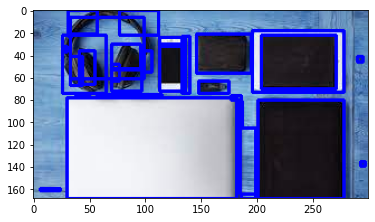

In [210]:
# draw bounding box
result_electronic = draw_boundingBox(img_electronic, img_canny_electronic)

# show
plt.imshow(result_electronic)
plt.show()